In [1]:
""" Starter code for simple linear regression example using placeholders
Created by Chip Huyen (huyenn@cs.stanford.edu)
CS20: "TensorFlow for Deep Learning Research"
cs20.stanford.edu
Lecture 03
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import utils

In [2]:
DATA_FILE = '../data/birth_life_2010.txt'

# Step 1: read in data from the .txt file
data, n_samples = utils.read_birth_life_data(DATA_FILE)

In [3]:
print(data.shape)
print(n_samples)

(190, 2)
190


In [4]:
# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
# Remember both X and Y are scalars with type float

X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

In [5]:
# Step 3: create weight and bias, initialized to 0.0
# Make sure to use tf.get_variable
#w, b = None, None
w = tf.get_variable("w", initializer=tf.constant(0.0))
b = tf.get_variable("b", initializer=tf.constant(0.0))
#############################
########## TO DO ############
#############################

In [6]:
# Step 4: build model to predict Y
# e.g. how would you derive at Y_predicted given X, w, and b
Y_predicted = w*X + b 
#############################
########## TO DO ############
#############################

In [7]:
# Step 5: use the square error as the loss function
# loss = None
# loss = tf.square(Y-Y_predicted, name="loss")
def huber_loss(labels, predictions, delta=14.0):
    residual = tf.abs(labels - predictions)
    def f1(): return 0.5 * tf.square(residual)
    def f2(): return delta * residual - 0.5 * tf.square(delta)
    return tf.cond(residual < delta, f1, f2)
loss = huber_loss(Y, Y_predicted)
#############################
########## TO DO ############
#############################

In [8]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

start = time.time()

# Create a filewriter to write the model's graph to TensorBoard
#############################
########## TO DO ############
#############################
writer = tf.summary.FileWriter("./huber_loss", graph=tf.get_default_graph())
tf.summary.scalar("loss",loss)

with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    #############################
    ########## TO DO ############
    #############################
    sess.run(tf.global_variables_initializer())
    
#     sess.run(tf.variables_initializer([w,b]))

    # Step 8: train the model for 100 epochs
    for i in range(100):
        total_loss = 0
        for x, y in data:
            # Execute train_op and get the value of loss.
            # Don't forget to feed in data for placeholders
            _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
#             writer.add_summary(loss, i)
            total_loss += l

        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    # close the writer when you're done using it
    #############################
    ########## TO DO ############
    #############################
    writer.close()
    
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w,b])
    #############################
    ########## TO DO ############
    #############################

print('Took: %f seconds' %(time.time() - start))



Epoch 0: 712.5349932218853
Epoch 1: 480.1768338768106
Epoch 2: 411.27837095009653
Epoch 3: 381.143803016763
Epoch 4: 363.96519568942387
Epoch 5: 352.0028216342001
Epoch 6: 342.65910039112754
Epoch 7: 334.84100784196664
Epoch 8: 327.9518736341282
Epoch 9: 321.63482000235666
Epoch 10: 315.6941960449968
Epoch 11: 310.0039571509844
Epoch 12: 304.4644903231608
Epoch 13: 299.0284345306064
Epoch 14: 293.6694770147926
Epoch 15: 288.3639233997778
Epoch 16: 283.0933333819634
Epoch 17: 277.85644171355585
Epoch 18: 272.6439291345446
Epoch 19: 267.44677355952166
Epoch 20: 262.2604390375855
Epoch 21: 257.0869516860634
Epoch 22: 251.93409620844758
Epoch 23: 246.7978311511443
Epoch 24: 241.68042829000441
Epoch 25: 236.58249802497158
Epoch 26: 231.50381602431207
Epoch 27: 226.4469073355737
Epoch 28: 221.41355832310785
Epoch 29: 216.40122747868298
Epoch 30: 211.41857506291646
Epoch 31: 206.4636872577824
Epoch 32: 201.5256608824981
Epoch 33: 196.60663773480215
Epoch 34: 191.69949661995236
Epoch 35: 186.8

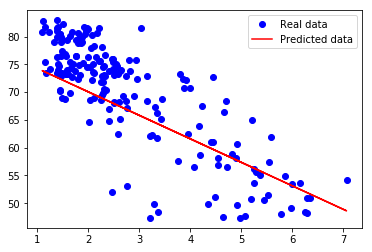

In [9]:
# uncomment the following lines to see the plot 
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()